In [ ]:
!apt-get install libzbar0
!pip install pyzbar

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libv4l-0 libv4lconvert0
The following NEW packages will be installed:
  libv4l-0 libv4lconvert0 libzbar0
0 upgraded, 3 newly installed, 0 to remove and 15 not upgraded.
Need to get 238 kB of archives.
After this operation, 817 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libv4lconvert0 amd64 1.18.0-2build1 [76.5 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 libv4l-0 amd64 1.18.0-2build1 [41.9 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 libzbar0 amd64 0.23-1.3 [119 kB]
Fetched 238 kB in 1s (272 kB/s)
Selecting previously unselected package libv4lconvert0:amd64.
(Reading database ... 123069 files and directories currently installed.)
Preparing to unpack .../libv4lconvert0_1.18.0-2build1_amd64.deb ...
Unpacking libv4lconvert0:amd64 (1.18.0-2build1) ...
Se

In [ ]:
from pyzbar import pyzbar
import cv2

b'4607023704821'
EAN13


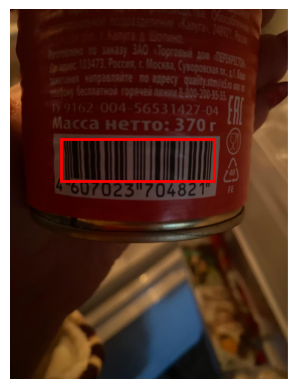

In [ ]:
import matplotlib.pyplot as plt
from pyzbar.pyzbar import decode

# Make one method to decode the barcode
def BarcodeReader(image):

	# read the image in numpy array using matplotlib.pyplot
	img = plt.imread(image)

	# Decode the barcode image
	detectedBarcodes = decode(img)

	# If not detected then print the message
	if not detectedBarcodes:
		print("Barcode Not Detected or your barcode is blank/corrupted!")
	else:
		# Traverse through all the detected barcodes in image
		for barcode in detectedBarcodes:
			# Locate the barcode position in image
			(x, y, w, h) = barcode.rect

			# Put the rectangle in image using
			# plt to highlight the barcode
			rect = plt.Rectangle((x-10, y-10), w+20, h+20, fill=False, edgecolor='red', linewidth=2)
			plt.gca().add_patch(rect)

			if barcode.data != "":
				# Print the barcode data
				print(barcode.data)
				print(barcode.type)

	# Display the image
	plt.imshow(img)
	plt.axis('off')
	plt.show()

if __name__ == "__main__":
	# Take the image from user
	image = "/content/000e5549-1ed8-4a1a-b303-fc1aed948864--ru.d4fc32d7-12d0-40fc-a8c7-80c11e9ca143.jpg"
	BarcodeReader(image)

Enter 1 for barcode or 2 for QR code: 2
QR Code Not Detected or your QR code is blank/corrupted!


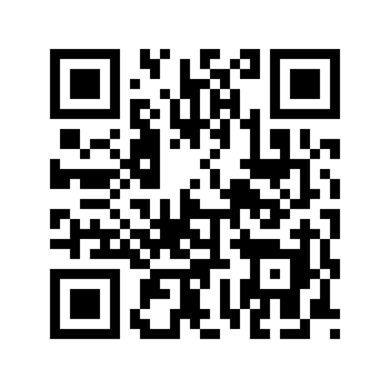

In [ ]:
import matplotlib.pyplot as plt
from pyzbar.pyzbar import decode

def BarcodeReader(image, option):
    # Read the image in numpy array using matplotlib.pyplot
    img = plt.imread(image)

    if option == 1:
        # Decode the barcode image
        detectedBarcodes = decode(img)

        # If not detected then print the message
        if not detectedBarcodes:
            print("Barcode Not Detected or your barcode is blank/corrupted!")
        else:
            # Traverse through all the detected barcodes in image
            for barcode in detectedBarcodes:
                # Locate the barcode position in image
                (x, y, w, h) = barcode.rect

                # Put the rectangle in image using plt to highlight the barcode
                rect = plt.Rectangle((x-10, y-10), w+20, h+20, fill=False, edgecolor='red', linewidth=2)
                plt.gca().add_patch(rect)

                if barcode.data != "":
                    # Print the barcode data
                    print("Barcode Data:", barcode.data)
                    print("Barcode Type:", barcode.type)
    elif option == 2:
        # Decode the QR code image
        decodedQR = decode(img)

        # If not detected then print the message
        if not decodedQR:
            print("QR Code Not Detected or your QR code is blank/corrupted!")
        else:
            # Traverse through all the detected QR codes in image
            for qr in decodedQR:
                # Locate the QR code position in image
                (x, y, w, h) = qr.rect

                # Put the rectangle in image using plt to highlight the QR code
                rect = plt.Rectangle((x, y), w, h, fill=False, edgecolor='green', linewidth=2)
                plt.gca().add_patch(rect)

                if qr.data != "":
                    # Print the QR code data
                    print("QR Code:", qr.data)

    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    # Take the image path from the user
    image_path = "/content/QR_code_for_mobile_English_Wikipedia.svg.png"

    # Take the option from the user (1 for barcode, 2 for QR code)
    option = int(input("Enter 1 for barcode or 2 for QR code: "))

    BarcodeReader(image_path, option)